# <center>OASBUD Data Processing `V0.1`</center>


<div style="text-align: right">Name: Boyang Wang</div> 
<div style="text-align: right"> Email: bwang40@hawk.iit.edu </div>
<div style="text-align: right">Date: Sept 27 2019</div>

## Information:

This is to parse the OASBUD original matlab data with python.

Rev 0.1 Re-implement MATLAB signal plot

In [2]:
from scipy.fftpack import fft
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
from tqdm import tnrange, tqdm_notebook
from scipy.io import loadmat
from scipy import signal
import matplotlib.pyplot as plt
import scipy.io as sio
import numpy as np
import os
import random
import time
import timeit

In [8]:
# load the OASBUD raw data from google drive
# The data is also available on website: https://zenodo.org/record/545928#.XY0eSkZKiic
origindata = loadmat("C:/Users/wangb/Documents/MATLAB/ultrasonic_image_nn/OASBUD_for_Python.mat")
subject = ["id", "rf1", "rf2", "roi1", "roi2", "birads", "class"]

tmpnames = origindata["id"]
tmprf1 = origindata["rf1"]
tmprf2 = origindata["rf2"]
tmproi1 = origindata["roi1"]
tmproi2 = origindata["roi2"]
tmptypes = origindata["class"]
tmpbirads = origindata["birads"]
names = []
rf1 = []
rf2 = []
roi1 = []
roi2 = []
types = []
birads = []

for index in range(0,100):
    names.append(tmpnames[0,index][0])
    rf1.append(tmprf1[0,index])
    rf2.append(tmprf2[0,index])
    roi1.append(tmproi1[0,index])
    roi2.append(tmproi2[0,index])
    types.append(tmptypes[0,index][0])
    birads.append(tmpbirads[0,index][0])
del tmprf1,tmprf2,tmproi1,tmproi2,tmptypes,tmpbirads

Fs = 40e6
T = 1/Fs

timeaxis = []
for index in range(0,100):
    N = rf1[index].shape[0]
    t = T * N
    timeaxisbuf = np.linspace(0,t,N)*1e6 #time axis in us
    timeaxis.append(timeaxisbuf)

In [32]:
randindex = random.randint(0,99)

testtime = timeaxis[randindex]
testrf1 = rf1[randindex]
testrf2 = rf2[randindex]
testroi1 = roi1[randindex]
testroi2 = roi2[randindex]

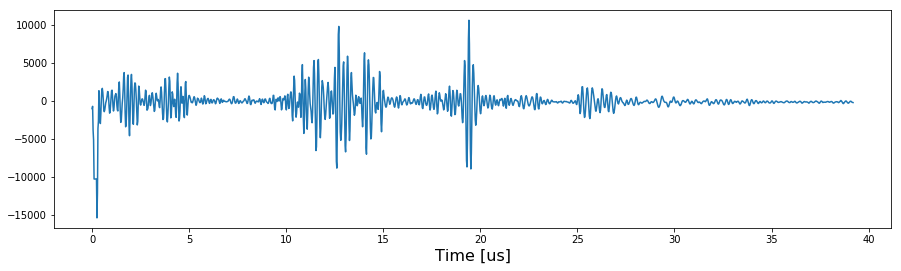

In [33]:
# First thing first, Time syncronization
# After programming, I found that syncronization is not necessary
# The delay of the signal is mostly under 1, 2 samples
index2 = random.randint(0,testrf1.shape[0-1])

_ = plt.figure(figsize = (15,4))
_ = plt.plot(testtime,testrf1[:,index2])
_ = plt.xlabel('Time [us]', fontsize=16)

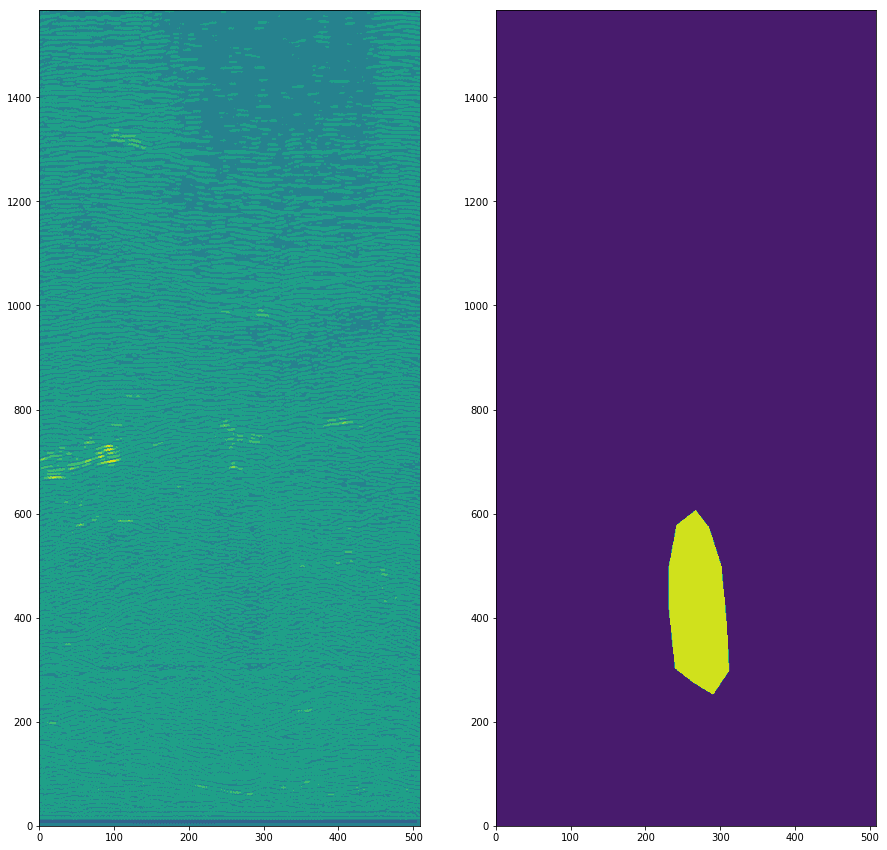

In [34]:
_ = plt.figure(figsize = (15,15))
_ = plt.subplot(121)
_ = plt.contourf(testrf1)
_ = plt.subplot(122)
_ = plt.contourf(testroi1)

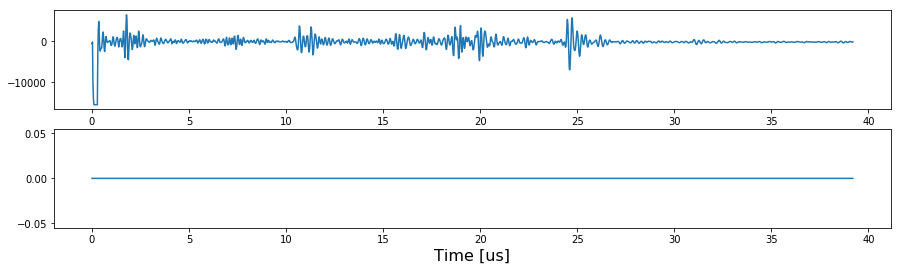

In [35]:
index2 = 230
_ = plt.figure(figsize = (15,4))
_ = plt.subplot(211)
_ = plt.plot(testtime,testrf1[:,index2])
_ = plt.xlabel('Time [us]', fontsize=16)
_ = plt.subplot(212)
_ = plt.plot(testtime,testroi1[:,index2])
_ = plt.xlabel('Time [us]', fontsize=16)

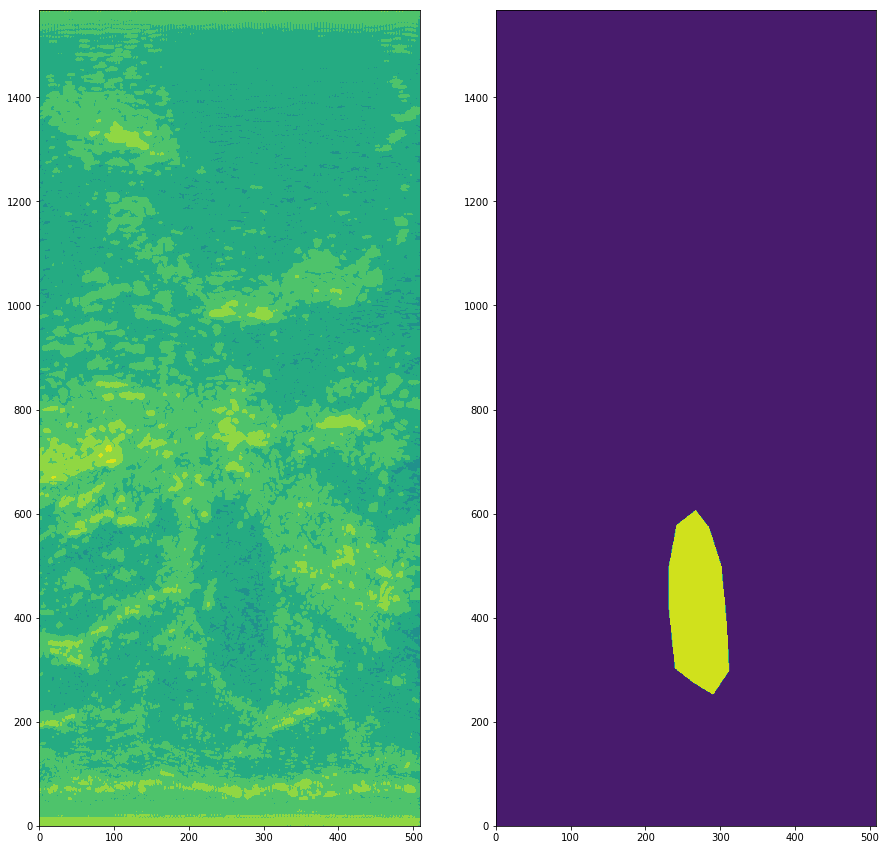

In [36]:
buffer = testrf1[:,1]

testhilbert = 20 * np.log10(abs(signal.hilbert(testrf1,axis=0)))

# plt.figure(figsize=(15,3))
# plt.plot(testhilbert[:,1])

_ = plt.figure(figsize = (15,15))
_ = plt.subplot(121)
_ = plt.contourf(testhilbert)
_ = plt.subplot(122)
_ = plt.contourf(testroi1)